
# Titanic Survival Prediction
# Covered all supervised learning techniques with EDA
I am trying to do my first kaggle project after half completing the half of the course in DataScience in Edwisor, i gathered so much information on the web to do this project,have done so much of research to find the best method, and took many hours to find simple coding for simple things.

https://www.kaggle.com/c/titanic this is the site where we can get the dataset to work with...

coding collection from 
https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 
EDA from 
https://www.kaggle.com/mviola/titanic-eda-simple-model-0-80861/notebook

https://notebooks.azure.com/solar/projects/Titanic/html/tutorial/3.A%20Data%20Science%20Framework%20To%20Achieve%2099%25%20Accuracy.ipynb


# Importing all the necessary libraries

In [2]:
# Linear Alzebra
import numpy as np

# Data Processing
import pandas as pd 

# For plotting/Data Visualization
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

# Algorithms
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
print('Setup complete')

Setup complete


In [3]:
train_data = pd.read_csv("titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [5]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
train_data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

 
38 % managed to survive in train dataset

# Feature Selection with sns to understand each and every column with the target variable

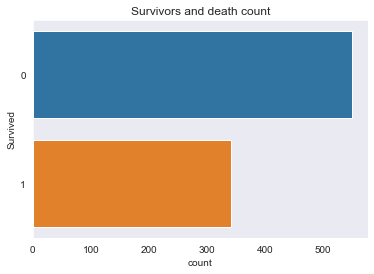

In [12]:
g = sns.countplot(y=train_data['Survived']).set_title('Survivors and death count')

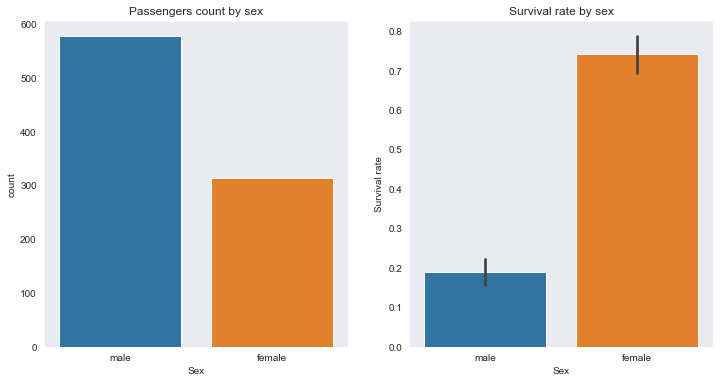

In [13]:
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
a = sns.countplot(train_data['Sex'], ax=axarr[0]).set_title('Passengers count by sex')
axarr[1].set_title('Survival rate by sex')
b = sns.barplot(x='Sex', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

#  
counting % age of no of males and females

In [14]:
from collections import Counter
Total_males = Counter(train_data['Sex'])['male']
Total_females = Counter(train_data['Sex'])['female']
Total = train_data.isnull().count()['Sex']
Percentage_males = Total_males/Total*100
Percentage_females = Total_females/Total*100
print("Perentage of males: {}".format(Percentage_males))
print("Percentage of females: {}".format(Percentage_females))

Perentage of males: 64.75869809203144
Percentage of females: 35.24130190796858


In [15]:
train_data.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [16]:
train_data.groupby(['Pclass', 'Sex']).Survived.mean() 

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

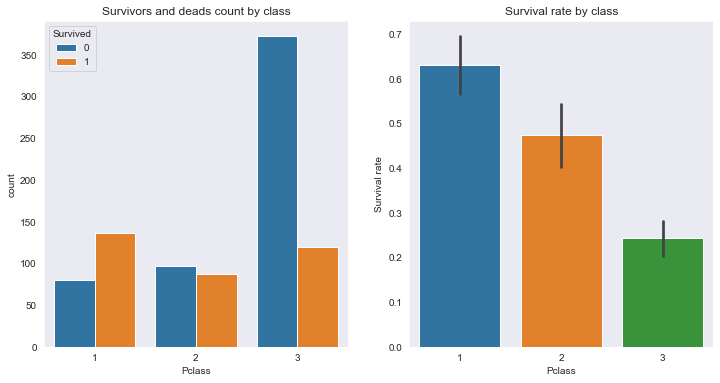

In [17]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Pclass', hue='Survived', data=train_data, 
                  ax=axarr[0]).set_title('Survivors and deads count by class')
axarr[1].set_title('Survival rate by class')
b = sns.barplot(x='Pclass', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

#  
Survival rate by class

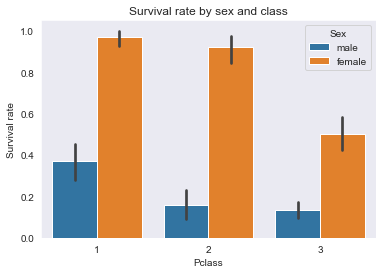

In [18]:
plt.title('Survival rate by sex and class')
g = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data).set_ylabel('Survival rate')

# Here is the plot of the age distribution in general compared to the one for the survivals and the deads.

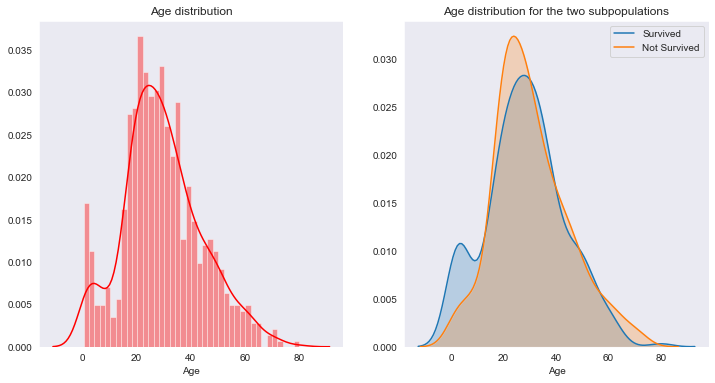

In [19]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
axarr[0].set_title('Age distribution')
f = sns.distplot(train_data['Age'], color='red', bins=40, ax=axarr[0])
axarr[1].set_title('Age distribution for the two subpopulations')
g = sns.kdeplot(train_data['Age'].loc[train_data['Survived'] == 1], 
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Age')
g = sns.kdeplot(train_data['Age'].loc[train_data['Survived'] == 0], 
                shade=True, ax=axarr[1], label='Not Survived')

C:\Users\bvrav\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\bvrav\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


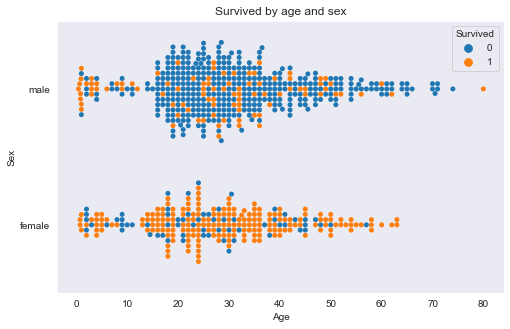

In [20]:
plt.figure(figsize=(8,5))
g = sns.swarmplot(y='Sex', x='Age', hue='Survived', data=train_data).set_title('Survived by age and sex')

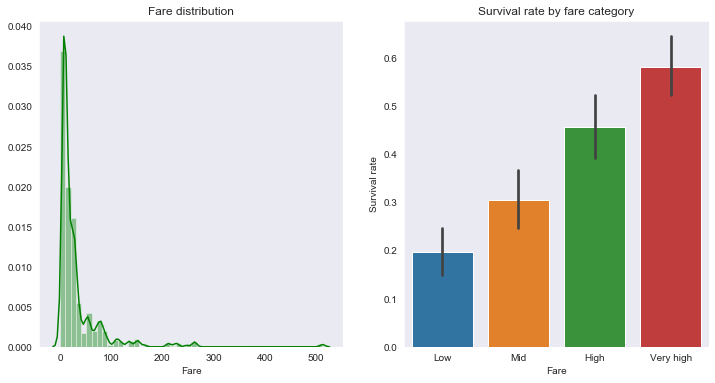

In [21]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
f = sns.distplot(train_data.Fare, color='g', ax=axarr[0]).set_title('Fare distribution')
fare_ranges = pd.qcut(train_data.Fare, 4, labels = ['Low', 'Mid', 'High', 'Very high'])
axarr[1].set_title('Survival rate by fare category')
g = sns.barplot(x=fare_ranges, y=train_data.Survived, ax=axarr[1]).set_ylabel('Survival rate')

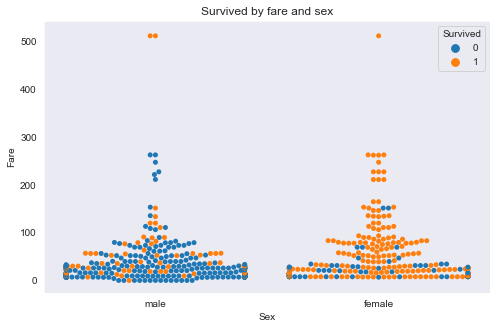

In [22]:
plt.figure(figsize=(8,5))
a = sns.swarmplot(x='Sex', y='Fare', hue='Survived',data=train_data).set_title('Survived by fare and sex')

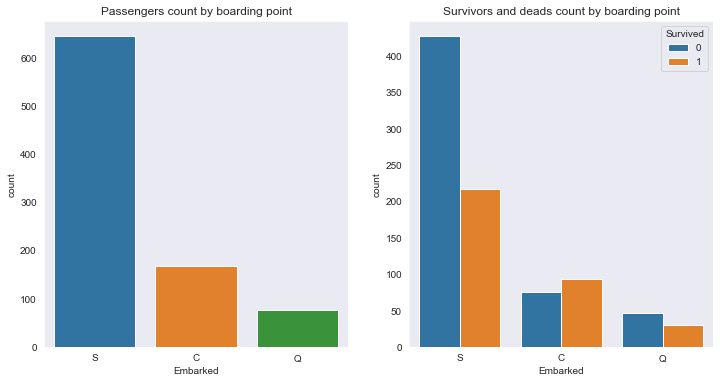

In [23]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
sns.countplot(train_data['Embarked'], ax=axarr[0]).set_title('Passengers count by boarding point')
p = sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data, ax=axarr[1]).set_title('Survivors and deads count by boarding point')

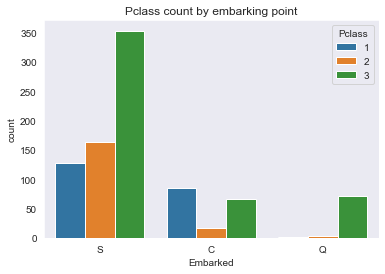

In [24]:
g = sns.countplot(data=train_data, x='Embarked', hue='Pclass').set_title('Pclass count by embarking point')

# Splitting Name adding a 'title' column in data sets 

In [25]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [26]:
train_data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Capt              1
Ms                1
Sir               1
Mme               1
the Countess      1
Don               1
Jonkheer          1
Lady              1
Name: Title, dtype: int64

In [27]:
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [28]:
train_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
test_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)

train_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
test_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

In [29]:
train_data.groupby('Title').Survived.mean()

Title
Dr        0.428571
Master    0.575000
Miss      0.707447
Mr        0.160000
Mrs       0.792000
Rev       0.000000
Name: Survived, dtype: float64

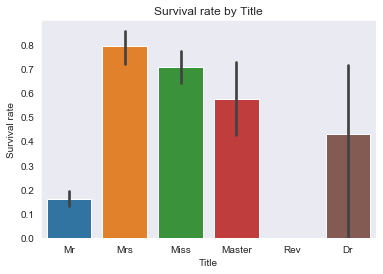

In [30]:
plt.title('Survival rate by Title')
g = sns.barplot(x='Title', y='Survived', data=train_data).set_ylabel('Survival rate')

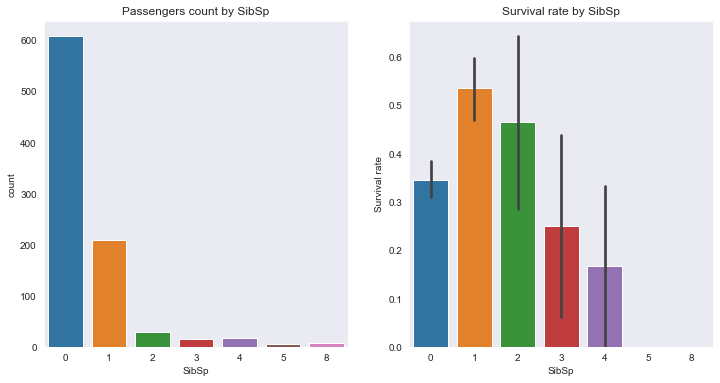

In [31]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['SibSp'], ax=axarr[0]).set_title('Passengers count by SibSp')
axarr[1].set_title('Survival rate by SibSp')
b = sns.barplot(x='SibSp', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

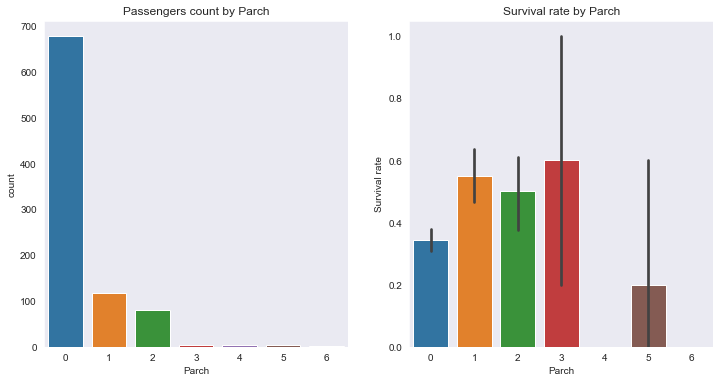

In [32]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['Parch'], ax=axarr[0]).set_title('Passengers count by Parch')
axarr[1].set_title('Survival rate by Parch')
b = sns.barplot(x='Parch', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

# SibSp = (number of siblings on board) / (number of spouse on board)

# ParCh = (number of Parents on board) / (number of Children on board)

In [33]:
data = [train_data, test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_data['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [34]:
train_data['Fam_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Fam_size'] = test_data['SibSp'] + test_data['Parch'] + 1
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,relatives,not_alone,Fam_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,0,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,3,0,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,0,1,1


In [35]:
train_data['Fam_type'] = pd.cut(train_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
test_data['Fam_type'] = pd.cut(test_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

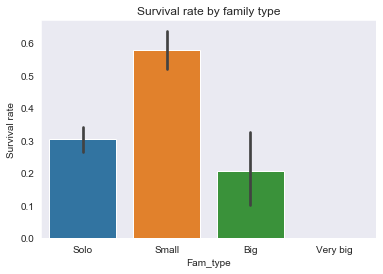

In [36]:
plt.title('Survival rate by family type')
g = sns.barplot(x=train_data.Fam_type, y=train_data.Survived).set_ylabel('Survival rate')


# as we can see from above plot that surivival rate doesnt depend on the family size

In [37]:
from collections import Counter
age = round(np.mean(train_data['Age']))
Counter(train_data['Embarked'])
c = Counter(train_data['Age'])

train_data["Embarked"].fillna("S", inplace = True)
train_data['Age'].fillna(round(np.mean(train_data['Age'])), inplace = True)

Counter(test_data['Embarked'])
c = Counter(test_data['Age'])

test_data["Embarked"].fillna("S", inplace = True)
test_data['Age'].fillna(round(np.mean(test_data['Age'])), inplace = True)
test_data

# we can use simply the below one

# common_value = 'S'
# data = [train_df, test_df]

# for dataset in data:
#     dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,relatives,not_alone,Fam_size,Fam_type
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,1,1,Solo
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,1,0,2,Small
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,1,1,Solo
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0,1,1,Solo
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2,0,3,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,0,1,1,Solo
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Miss,0,1,1,Solo
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0,1,1,Solo
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S,Mr,0,1,1,Solo


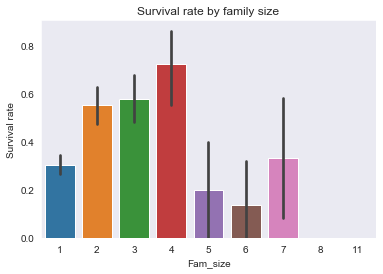

In [38]:
plt.title('Survival rate by family size')
g = sns.barplot(x=train_data.Fam_size, y=train_data.Survived).set_ylabel('Survival rate')


In [39]:
y = train_data['Survived']
features = ['Pclass', 'Sex', 'Fare', 'Title', 'Embarked','Age','Fam_size']
X = train_data[features]
X.head()

,Pclass,Sex,Fare,Title,Embarked,Age,Fam_size
0,3,male,7.2500,Mr,S,22.0,2
1,1,female,71.2833,Mrs,C,38.0,2
2,3,female,7.9250,Miss,S,26.0,1
3,1,female,53.1000,Mrs,S,35.0,2
4,3,male,8.0500,Mr,S,35.0,1


In [40]:
X.info()
test_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Fare      891 non-null    float64
 3   Title     891 non-null    object 
 4   Embarked  891 non-null    object 
 5   Age       891 non-null    float64
 6   Fam_size  891 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,relatives,not_alone,Fam_size,Fam_type
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,1,1,Solo
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,1,0,2,Small
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,1,1,Solo
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0,1,1,Solo
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2,0,3,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,0,1,1,Solo
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Miss,0,1,1,Solo
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0,1,1,Solo
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S,Mr,0,1,1,Solo


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in X.columns:
    if X.dtypes[i] == object:
        X[i]= le.fit_transform(X[i])

C:\Users\bvrav\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [42]:
X

,Pclass,Sex,Fare,Title,Embarked,Age,Fam_size
0,3,1,7.2500,3,2,22.0,2
1,1,0,71.2833,4,0,38.0,2
2,3,0,7.9250,2,2,26.0,1
3,1,0,53.1000,4,2,35.0,2
4,3,1,8.0500,3,2,35.0,1
...,...,...,...,...,...,...,...
886,2,1,13.0000,5,2,27.0,1
887,1,0,30.0000,2,2,19.0,1
888,3,0,23.4500,2,2,30.0,4
889,1,1,30.0000,3,0,26.0,1


In [43]:
X['Fam_size'].value_counts() # though there is no differrence in using fam_size, lets keep it 

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Fam_size, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 7)
(223, 7)
(668,)
(223,)


# Feature selection/ also known as Dimesionality reduction 
we can use all the three feature selections ...

1) Univariate Selection

2) Feature Importance

3) Correlation Matrix with Heatmap

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [46]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)

In [47]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [48]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,Pclass,30.873699
1,Sex,92.702447
2,Fare,4518.319091
3,Title,1.576272
4,Embarked,10.202525
5,Age,25.243230
6,Fam_size,0.336787


In [49]:
print(featureScores.nlargest(6,'Score')) #presents 6 best features in a descending order

      Specs        Score
2      Fare  4518.319091
1       Sex    92.702447
0    Pclass    30.873699
5       Age    25.243230
4  Embarked    10.202525
3     Title     1.576272


## Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [51]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.10683678 0.25837681 0.23567758 0.08004902 0.02874631 0.22076371
 0.0695498 ]


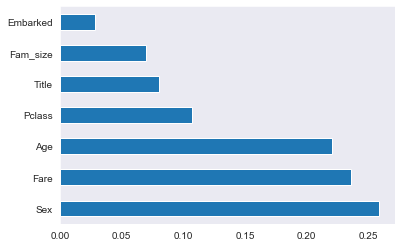

In [52]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

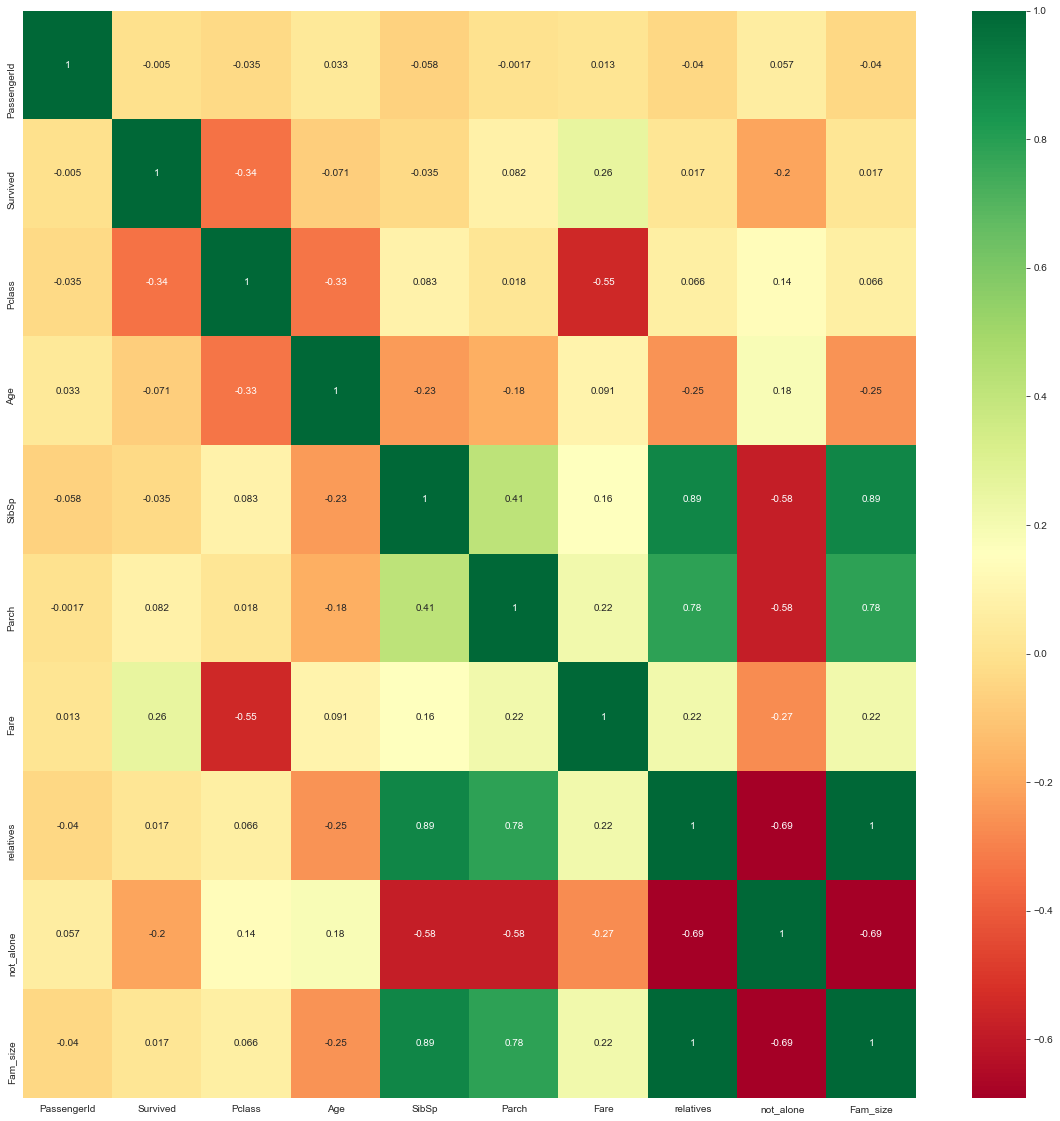

In [53]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# using standard scaling
MinMaxScaler can also be used

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 7)
(223, 7)
(668,)
(223,)


# Stochastic Gradient Descent (SGD):

In [55]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
x = pd.DataFrame(y_pred)

# from sklearn.model_selection import cross_val_score
# rf = SGDClassifier(n_estimators=100)
# scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
# print("Scores:", scores)
# print("Mean:", scores.mean())
# print("Standard Deviation:", scores.std())

# Random Forest:

In [56]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)



print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# from sklearn.model_selection import cross_val_score
# rf = RandomForestClassifier(n_estimators=100)
# scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
# print("Scores:", scores)
# print("Mean:", scores.mean())
# print("Standard Deviation:", scores.std())

(668, 7)
(223, 7)
(668,)
(223,)


### Test new Parameters for Random Forest

In [57]:
# random_forest = RandomForestClassifier(criterion = "gini", 
#                                        min_samples_leaf = 1, 
#                                        min_samples_split = 10,   
#                                        n_estimators=100, 
#                                        max_features='auto', 
#                                        oob_score=True, 
#                                        random_stat36e=1, 
#                                        n_jobs=-1)

# random_forest.fit(X_train, y_train)
# y_prediction = random_forest.predict(X_test)

# random_forest.score(X_train, y_train)

# print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

# Logistic Regression:

In [58]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

# Gaussian Naive Bayes:

In [59]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

# Perceptron:

In [60]:
perceptron = Perceptron(max_iter=10)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

# Linear Support Vector Machine:

In [61]:
linear_svc = LinearSVC(max_iter=30)
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

C:\Users\bvrav\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Decision Tree

In [62]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

# KNN

In [63]:
knn = KNeighborsClassifier(n_neighbors = 12) 
knn.fit(X_train, y_train)  
y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

# Which is the best Model ?

In [64]:
# results = pd.DataFrame({
#     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
#               'Random Forest', 'Naive Bayes', 'Perceptron', 
#               'Stochastic Gradient Decent', 
#               'Decision Tree'],
#     'Score': [acc_linear_svc, acc_knn, acc_log, 
#               acc_random_forest, acc_gaussian, acc_perceptron, 
#               acc_sgd, acc_decision_tree]})
# result_df = results.sort_values(by='Score', ascending=False)
# result_df = result_df.set_index('Score')
# result_df.head(9)

# From above random forest provided the highest accuracy rate
# for further evaluation we can use the following.....

we can mark down the remaining algorithms we can only keep the coding of Random forest and proceed further....

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)



Confusion Matrix:
[[123  14]
 [ 26  60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       137
           1       0.81      0.70      0.75        86

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223

Accuracy: 0.820627802690583


In [66]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.68


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.68')

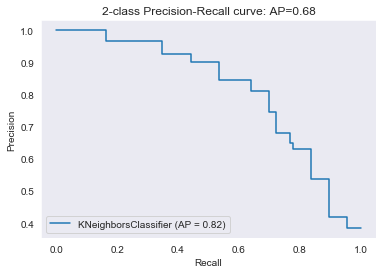

In [67]:
# classifier in the below code can be KNN, Random_forest, desicion_tree used in its code
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(knn, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### more can be done with precion , recall , ROC curve in 
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=Precision%2DRecall%20is%20a%20useful,the%20classes%20are%20very%20imbalanced.&text=A%20high%20area%20under%20the,a%20low%20false%20negative%20rate.

### Deploying the model with random forest as it gives Max Accuracy

In [68]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,stratify = y)


In [69]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
relatives        0
not_alone        0
Fam_size         0
Fam_type         0
dtype: int64

In [70]:
# test_data['Age'].fillna(round(np.mean(train_data['Age'])), inplace = True)
# test_data

In [71]:
features = ['Pclass', 'Sex', 'Fare', 'Title', 'Embarked','Age','Fam_size']
test_data = test_data[features]
test_data

,Pclass,Sex,Fare,Title,Embarked,Age,Fam_size
0,3,male,7.8292,Mr,Q,34.5,1
1,3,female,7.0000,Mrs,S,47.0,2
2,2,male,9.6875,Mr,Q,62.0,1
3,3,male,8.6625,Mr,S,27.0,1
4,3,female,12.2875,Mrs,S,22.0,3
...,...,...,...,...,...,...,...
413,3,male,8.0500,Mr,S,30.0,1
414,1,female,108.9000,Miss,C,39.0,1
415,3,male,7.2500,Mr,S,38.5,1
416,3,male,8.0500,Mr,S,30.0,1


In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in test_data.columns:
    if test_data.dtypes[i] == object:
        test_data[i]= le.fit_transform(test_data[i])
        
test_data

C:\Users\bvrav\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Pclass,Sex,Fare,Title,Embarked,Age,Fam_size
0,3,1,7.8292,3,1,34.5,1
1,3,0,7.0000,4,2,47.0,2
2,2,1,9.6875,3,1,62.0,1
3,3,1,8.6625,3,2,27.0,1
4,3,0,12.2875,4,2,22.0,3
...,...,...,...,...,...,...,...
413,3,1,8.0500,3,2,30.0,1
414,1,0,108.9000,2,0,39.0,1
415,3,1,7.2500,3,2,38.5,1
416,3,1,8.0500,3,2,30.0,1


In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# scaler.fit(test_data)
test_data = scaler.fit_transform(test_data)
X = scaler.fit_transform(X)
# np.reshape(y,(-1, 1))
# y = scaler.fit_transform(y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(test_data.shape)
print(y.shape)
y.describe()


(668, 7)
(223, 7)
(668,)
(223,)
(891, 7)
(418, 7)
(891,)


count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [74]:
knn = KNeighborsClassifier(n_neighbors = 12) 
knn.fit(X, y)  
y_pred = knn.predict(test_data)  



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
0.8294


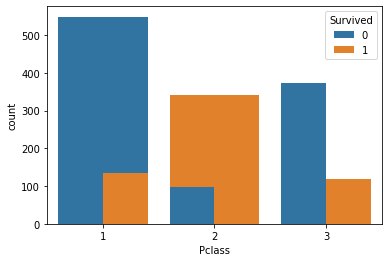

In [1]:
#import all requiring libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#loading input data sets
train_raw = pd.read_csv("titanic/train.csv")
test_raw = pd.read_csv("titanic/test.csv")
#print the first several lines
train_raw.head()
#brief information
train_raw.info()
#percentage of survival
train_raw["Survived"].value_counts(normalize=True)
#countplot of survival
sns.countplot(train_raw['Survived'])
#crosstab the survival in Pclass
pd.crosstab(train_raw["Survived"], train_raw["Pclass"], margins=True)
#count the mean of survival in Pclass
train_raw['Survived'].groupby(train_raw['Pclass']).mean()
#countplot the survival in Pclass
sns.countplot(train_raw['Pclass'], hue=train_raw['Survived'])
#display the name
train_raw['Name'].head()
#distribution of the titles of name
train_raw['Name_Title'] = train_raw['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train_raw['Name_Title'].value_counts()
#average survival rate of title of name
train_raw['Survived'].groupby(train_raw['Name_Title']).mean()
#observing the survival in age
train_raw['Survived'].groupby(pd.qcut(train_raw['Age'],5)).mean()
#count by age
pd.qcut(train_raw['Age'],5).value_counts()
#crosstab the survival in gender
pd.crosstab(train_raw.Survived, train_raw.Sex, margins=True)
#selecting the major part according to gender
answer_everyone_died = pd.DataFrame({"PassengerId":test_raw.PassengerId, "Survived":0})
answer_everyone_died.to_csv("submission_zeros.csv", index=False)
#selected by gender
test_gender_submission = test_raw.copy()
test_gender_submission["Survived"] = 0
test_gender_submission.loc[(test_gender_submission["Sex"]=="female"), "Survived"] = 1
my_gender_submission = pd.DataFrame({"PassengerId":test_gender_submission["PassengerId"], "Survived":test_gender_submission["Survived"]})
my_gender_submission.to_csv("my_gender_submission.csv", index=False)
#crosstab the survival in gender and children
train_2 = train_raw.copy()
train_2["MightSurvive"] = 0
train_2.loc[(train_2["Sex"]=="female") | (train_2["Age"] < 10), "MightSurvive"] = 1
pd.crosstab(train_2["Survived"], train_2["MightSurvive"], margins=True)
#selected by gender and children
test_gender_children_submission = test_raw.copy()
test_gender_children_submission["MightSurvive"] = 0
test_gender_children_submission.loc[(test_gender_children_submission["Sex"]=="female") | (test_gender_children_submission["Age"]<10), "MightSurvive"] = 1
gender_children_submission = pd.DataFrame({"PassengerId":test_gender_children_submission["PassengerId"], "Survived":test_gender_children_submission["MightSurvive"]})
gender_children_submission.to_csv("gender_children_submission.csv", index=False)
#crosstab the survival in sibsp and parch
train_2.loc[(train_2.Parch >= 4), "MightSurvive"] = 0
train_2.loc[(train_2.SibSp >= 4), "MightSurvive"] = 0
pd.crosstab(train_2["Survived"], train_2["MightSurvive"], margins=True)
#selected by sibsp and parch
test_tweaked_submission = test_raw.copy()
test_tweaked_submission["MightSurvive"] = 0
test_tweaked_submission.loc[(test_tweaked_submission["Sex"]=="female")|(test_tweaked_submission["Age"]<10), "MightSurvive"] = 1
test_tweaked_submission.loc[(test_tweaked_submission["Parch"]>=4), "MightSurvive"] = 0
test_tweaked_submission.loc[(test_tweaked_submission["SibSp"]>=4), "MightSurvive"] = 0
tweaked_submission = pd.DataFrame({"PassengerId":test_tweaked_submission["PassengerId"], "Survived":test_tweaked_submission["MightSurvive"]})
tweaked_submission.to_csv("manually_tweaked_submission.csv", index=False)
#extracting name feature
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test
#imputing age feature
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test
#form the family size
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test
#ticket column
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x: str(x))
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                   np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test
#carbin column
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test
#embarked column
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test
#dummy variables
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test
#drop column
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test
#prepare data
train_new = train_raw.copy()
test_new = test_raw.copy()
train_new, test_new = names(train_new, test_new)
train_new, test_new = age_impute(train_new, test_new)
train_new, test_new = cabin_num(train_new, test_new)
train_new, test_new = cabin(train_new, test_new)
train_new, test_new = embarked_impute(train_new, test_new)
train_new, test_new = fam_size(train_new, test_new)
test_new['Fare'].fillna(train_new['Fare'].mean(), inplace = True)
train_new, test_new = ticket_grouped(train_new, test_new)
train_new, test_new = dummies(train_new, test_new, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size'])
train_new, test = drop(train_new, test_new)
#random forest model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(train_new.iloc[:, 1:], train_new.iloc[:, 0])

#fit the model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train_new.iloc[:, 1:], train_new.iloc[:, 0])
print("%.4f" % rf.oob_score_)
#variable importance
pd.concat((pd.DataFrame(train_new.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]
#prediction
predictions = rf.predict(test_new)
predictions = pd.DataFrame(predictions, columns=['Survived'])
predictions = pd.concat((test_raw.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('random_forest_model.csv', sep=",", index = False)

In [3]:
test_new.isnull().sum()

Age                           0
Fare                          0
Name_Len                      0
Age_Null_Flag                 0
Cabin_num_(1.999, 28.667]     0
Cabin_num_(28.667, 65.667]    0
Cabin_num_(65.667, 148.0]     0
Ticket_Len                    0
Pclass_3                      0
Pclass_1                      0
Pclass_2                      0
Sex_male                      0
Sex_female                    0
Embarked_S                    0
Embarked_C                    0
Embarked_Q                    0
Ticket_Lett_A                 0
Ticket_Lett_P                 0
Ticket_Lett_S                 0
Ticket_Lett_1                 0
Ticket_Lett_3                 0
Ticket_Lett_2                 0
Ticket_Lett_C                 0
Ticket_Lett_Low_ticket        0
Ticket_Lett_Other_ticket      0
Cabin_Letter_n                0
Cabin_Letter_C                0
Cabin_Letter_E                0
Cabin_Letter_G                0
Cabin_Letter_D                0
Cabin_Letter_A                0
Cabin_Le